In [1]:
pip install seaborn

     |████████████████████████████████| 292 kB 4.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing the dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing CSV files 
df_1 = pd.read_csv('user_info.csv')
df_2 = pd.read_csv('transaction_info.csv')

In [4]:
#merging both csv files 
df  = pd.merge(df_1, df_2, on='user_id', how='inner')
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)
#df.head()

In [5]:
#encoding the catagorical values 
label_encoder = preprocessing.LabelEncoder()
df['is_fraud']= label_encoder.fit_transform(df['is_fraud']) 
df['premium_tier']= label_encoder.fit_transform(df['premium_tier'])
df['was_referred']= label_encoder.fit_transform(df['was_referred'])

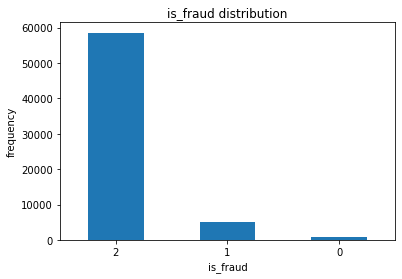

In [6]:
# checking is_fraud distribution
count_is_fraud= pd.value_counts(df['is_fraud'],sort= True)
count_is_fraud.plot(kind = 'bar', rot=0)
plt.title('is_fraud distribution')
plt.xticks(range(3) )
plt.xlabel('is_fraud')
plt.ylabel('frequency')
plt.show();

In [7]:
#replaceing is_fraud values from 2 to 0
df.replace({'is_fraud':{ 2 : 0 }}, inplace= True)

In [8]:
#spliting the dataset in two ie.fraud transaction and normal transaction
fraud = df[df.is_fraud == 1]
normal = df[df.is_fraud == 0]

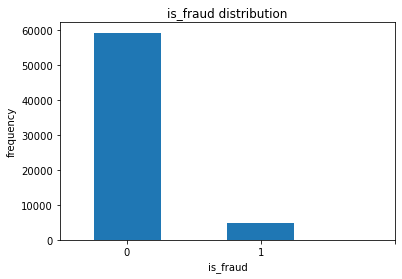

In [9]:
# checking is_fraud distribution
count_is_fraud= pd.value_counts(df['is_fraud'],sort= True)
count_is_fraud.plot(kind = 'bar', rot=0)
plt.title('is_fraud distribution')
plt.xticks(range(3) )
plt.xlabel('is_fraud')
plt.ylabel('frequency')
plt.show();

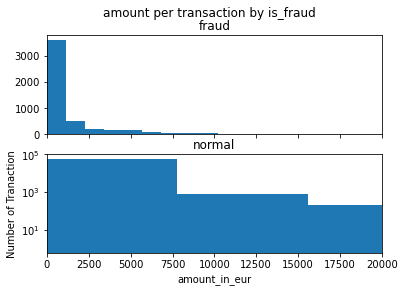

In [10]:
#plotting the graph of amount in euro by fraud and normal transaction
f,(ax1,ax2) = plt.subplots(2,1,sharex = True)
f.suptitle('amount per transaction by is_fraud')
bins = 50 
ax1.hist(fraud.amount_in_eur, bins = bins) 
ax1.set_title('fraud')
ax2.hist(normal.amount_in_eur,bins=bins)
ax2.set_title('normal')
plt.xlabel('amount_in_eur')
plt.ylabel('Number of Tranaction')
plt.xlim((0,20000))
plt.yscale('log')
plt.show();

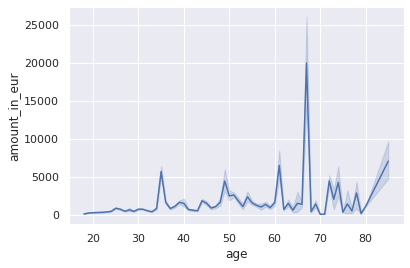

In [11]:
# amount of transaction by age 
sns.set_theme(style="darkgrid")
sns.lineplot(x="age", y="amount_in_eur",data=df);

<Figure size 1584x720 with 0 Axes>

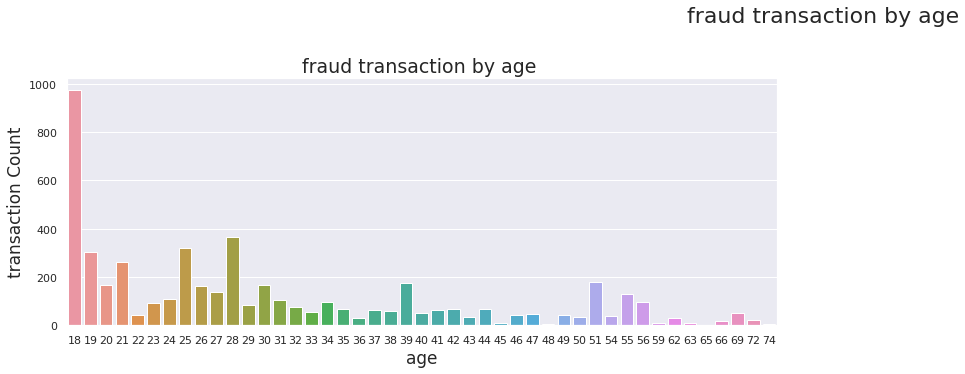

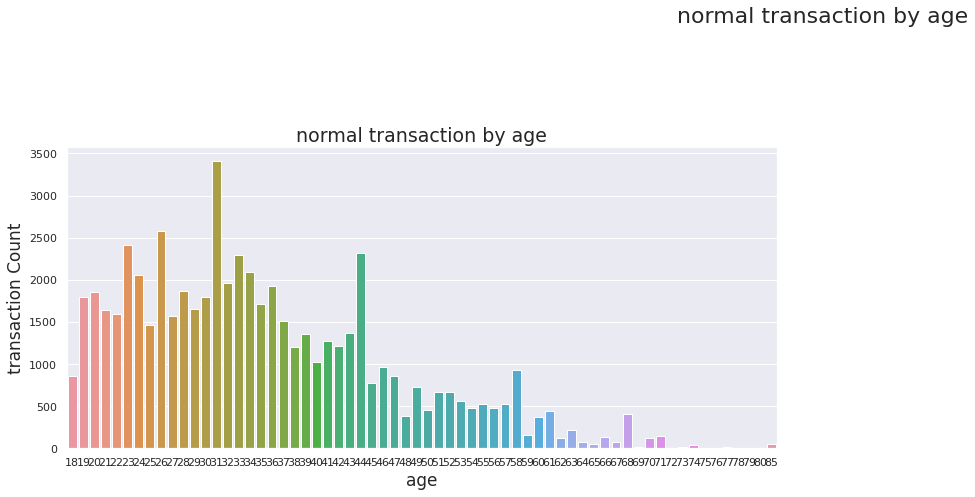

In [12]:
#distribution of fraud and normal transaction by age 
plt.figure(figsize=(22,10))
#plt.suptitle('event_kind Distributions', fontsize=22)
plt.figure(figsize=(28,10))
plt.suptitle('fraud transaction by age', fontsize=22)
plt.subplot(221)
g = sns.countplot(x='age', data=fraud)
g.set_title("fraud transaction by age ", fontsize=19)
g.set_xlabel("age", fontsize=17)
g.set_ylabel("transaction Count", fontsize=17)       
plt.figure(figsize=(28,15))
plt.suptitle('normal transaction by age', fontsize=22)
plt.subplot(221)
g = sns.countplot(x='age', data=normal)
g.set_title("normal transaction by age", fontsize=19)
g.set_xlabel("age", fontsize=17)
g.set_ylabel("transaction Count", fontsize=17)
plt.subplots_adjust(hspace = 0.6, top = 0.85)
plt.show();

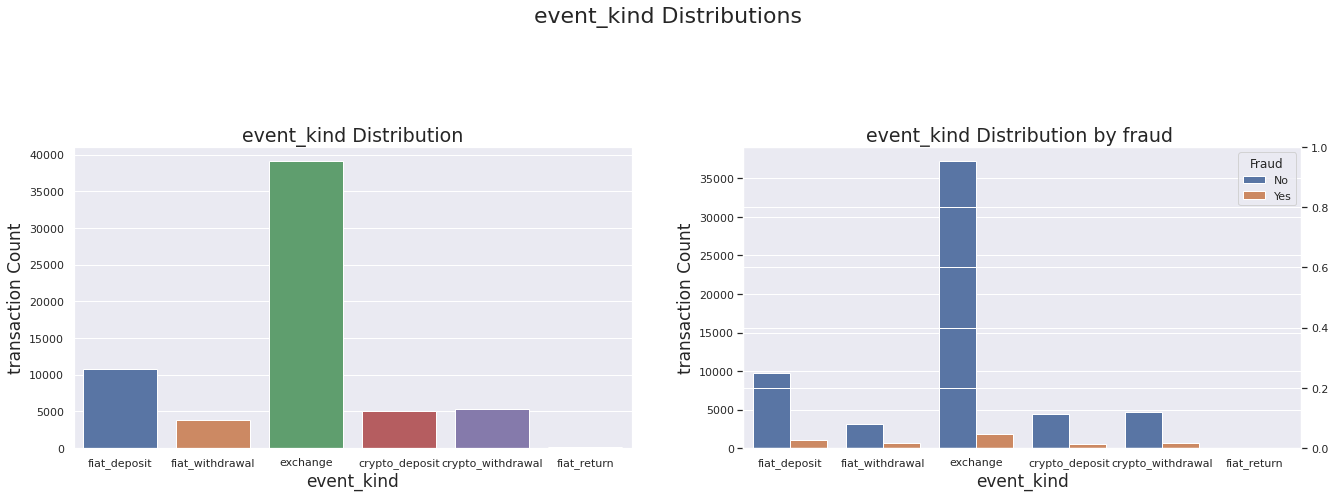

In [13]:
# event_kind distribution of fraud and normal transaction  
tmp = pd.crosstab(df['event_kind'], df['is_fraud'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'normal', 1:'Fraud'}, inplace=True)
plt.figure(figsize=(22,15))
plt.suptitle('event_kind Distributions', fontsize=22)
plt.subplot(221)
g = sns.countplot(x='event_kind', data=df)
g.set_title("event_kind Distribution", fontsize=19)
g.set_xlabel("event_kind", fontsize=17)
g.set_ylabel("transaction Count", fontsize=17)     
plt.subplot(222)
g1 = sns.countplot(x='event_kind', hue='is_fraud', data=df)
plt.legend(title='Fraud', loc='best', labels=['No', 'Yes'])
gt = g1.twinx()
#gt = sns.pointplot(x='event_kind', y='Fraud', data=tmp, color='black',  legend=False)
g1.set_title("event_kind Distribution by fraud ", fontsize=19)
g1.set_xlabel("event_kind", fontsize=17)
g1.set_ylabel("transaction Count", fontsize=17)
plt.subplots_adjust(hspace = 0.6, top = 0.85)
plt.show()

In [14]:
#getting the difference in day from onboarding to fraud transiction
fraud.onboarding_completed_at=pd.to_datetime(fraud.onboarding_completed_at)
fraud.timestamp=pd.to_datetime(fraud.timestamp)
fraud['diff_days']=(fraud.timestamp-fraud.onboarding_completed_at)

In [15]:
#spliting the difference day from the fraud timestamp
fraud["diff_days"] = fraud["diff_days"].astype(str)
fraud["days"] = fraud['diff_days'].apply(lambda num : num.split(" ")[0] )
fraud['time'] = fraud['diff_days'].apply(lambda num : num.split(" ")[2] )


In [16]:
#converting the days from object to int datatype to form a graph
fraud["days"] = fraud["days"].astype(int)

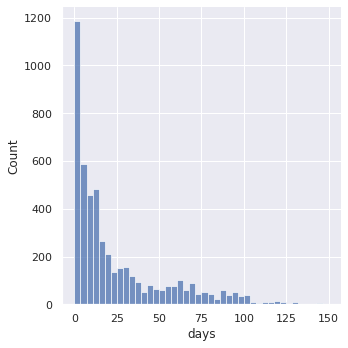

In [17]:
# plotting the graph of the difference days from onboarding to fraud transaction
sns.displot(fraud, x="days" );